# Multiple Linear Regression 

#### Problem Statement
Objective: Mathematical model is proposed and developed using multivariate regression equation for the prediction of the net hourly electrical energy output (EP) of the plant.
#### Dataset:
* The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. 

##### Attribute Description
Features consist of hourly average ambient variables 
    *  Temperature (T) in the range 1.81°C and 37.11°C
    *  Ambient Pressure (AP) in the range 992.89-1033.30 milibar
    *  Relative Humidity (RH) in the range 25.56% to 100.16%
    *  Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
    *  Net hourly electrical energy output (EP) 420.26-495.76 MW  -Taget variable

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.
Machine Learning model: Apply Linear Regression-
 
#### The objectives of today’s activity are :
* Building a regression model to predict 


### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times|\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\mid\dfrac{\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}}{y_{i}}\mid$$


### Loading the required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from  matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Loading the data

In [ ]:
import os
os.getcwd()
os.listdir('./')

['.config', 'PredictEnergy1.csv', 'sample_data']

In [ ]:
data = pd.read_csv("./PredictEnergy1.csv")
print(data.shape)
data.head(3)

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


### Renaming the columns

In [ ]:
data.columns=["Amb_Temperature","Exhaust_Vaccum","Amb_Pressure","Rel_Humidity","Target"]

### Display the columns

In [ ]:
data.columns

Index(['Amb_Temperature', 'Exhaust_Vaccum', 'Amb_Pressure', 'Rel_Humidity',
       'Target'],
      dtype='object')

### Data Understanding

In [ ]:
data.dtypes

Amb_Temperature    float64
Exhaust_Vaccum     float64
Amb_Pressure       float64
Rel_Humidity       float64
Target             float64
dtype: object

#### Summary Statistics using describe()

Descriptive or Summary Statistic of the numeric columns

    It excludes character column and calculate summary statistics only for numeric columns

In [ ]:
data.describe()

,Amb_Temperature,Exhaust_Vaccum,Amb_Pressure,Rel_Humidity,Target
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### A check on Target Data

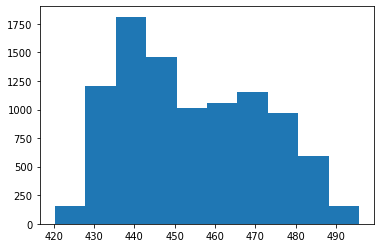

In [ ]:
plt.hist(data['Target'])
plt.show(True)

#### An initial understanding of few variables Vs Target

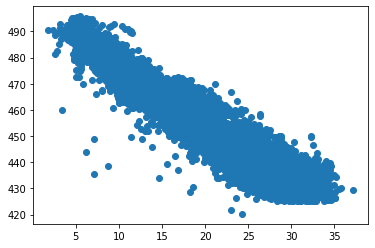

In [ ]:
plt.scatter(data['Amb_Temperature'],data['Target'])

### Data Preparation
##### Few checks at the begining 
    * Are there any duplicate rows  in the data.
    * Are there any columns with no variance.  

#### Drop duplicate rows from the data -It is on train

In [ ]:
data.columns

Index(['Amb_Temperature', 'Exhaust_Vaccum', 'Amb_Pressure', 'Rel_Humidity',
       'Target'],
      dtype='object')

In [ ]:
# Drop duplicate rows
print(data.shape)
data_unique=data.drop_duplicates(keep='first')
print(data_unique.shape)

(9568, 5)
(9527, 5)


In [ ]:
#Drop if you have any constant columns in the data
#As this data does not have any column as such 
data1=data.copy()
print(data1.columns)
print(data1.head(2))
data1=data1.loc[:, (data1 != data1.iloc[0]).any()] #if the column has constant then it will drop the column
print(data1.columns)

Index(['Amb_Temperature', 'Exhaust_Vaccum', 'Amb_Pressure', 'Rel_Humidity',
       'Target'],
      dtype='object')
   Amb_Temperature  Exhaust_Vaccum  Amb_Pressure  Rel_Humidity  Target
0            14.96           41.76       1024.07         73.17  463.26
1            25.18           62.96       1020.04         59.08  444.37
Index(['Amb_Temperature', 'Exhaust_Vaccum', 'Amb_Pressure', 'Rel_Humidity',
       'Target'],
      dtype='object')


* No constant columns in the data

### Check Are there any missing values in the data
* In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb
* isna()
* Drop rows which contains missing values
* If required you can impute the value with mean/median/mode/constant - Your choice and based on domain
    * Manual imputation by column
    * SimpleImputer from sklearn
    

In [ ]:
data.isna().sum()

Amb_Temperature    0
Exhaust_Vaccum     0
Amb_Pressure       0
Rel_Humidity       0
Target             0
dtype: int64

* No missing values in the data -Hence the following cells are commented out _ If there are any missingvalues- you can prefer one of the following based on % of missing values

In [ ]:
# Drop rows which contains missing values _ Given data does not have any missing values
# print(data1.shape)
# data1.dropna(inplace=True)
# print(data1.shape)

In [ ]:
# Manual imputation by column
# print(data1.shape)
# data1.loc[data1[' '].isna(),' ']=data1[' '].mean() # similarly you can use median,mode

In [ ]:
# # Using sklearn
from sklearn.impute import SimpleImputer
data1=data.copy()
print(data1.head(3))
# As this dataset does not have any missing values - sanity check
data1.Amb_Temperature[0]=np.NaN
print(data1.head(3))
print(data1.dtypes)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

pd.DataFrame(imp_mean.fit_transform(data1)).head(3)

   Amb_Temperature  Exhaust_Vaccum  Amb_Pressure  Rel_Humidity  Target
0            14.96           41.76       1024.07         73.17  463.26
1            25.18           62.96       1020.04         59.08  444.37
2             5.11           39.40       1012.16         92.14  488.56
   Amb_Temperature  Exhaust_Vaccum  Amb_Pressure  Rel_Humidity  Target
0              NaN           41.76       1024.07         73.17  463.26
1            25.18           62.96       1020.04         59.08  444.37
2             5.11           39.40       1012.16         92.14  488.56
Amb_Temperature    float64
Exhaust_Vaccum     float64
Amb_Pressure       float64
Rel_Humidity       float64
Target             float64
dtype: object


,0,1,2,3,4
0,19.651722,41.76,1024.07,73.17,463.26
1,25.180000,62.96,1020.04,59.08,444.37
2,5.110000,39.40,1012.16,92.14,488.56


### Check the datatype of each varaible 
* Convert one type to another based on domain and your intution
    * Eg: int/float/object to catgerical

In [ ]:
data.dtypes

Amb_Temperature    float64
Exhaust_Vaccum     float64
Amb_Pressure       float64
Rel_Humidity       float64
Target             float64
dtype: object

### We are done with majority of data preprocessing 
* Now we can focus on Data Analysis.
* As it is linear regression- 
    * Check the correlation among varaibles

In [ ]:
#data.corr()
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Amb_Temperature,Exhaust_Vaccum,Amb_Pressure,Rel_Humidity,Target
Amb_Temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Exhaust_Vaccum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Amb_Pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Rel_Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Target,-0.948128,-0.869780,0.518429,0.389794,1.000000


### Exploratory Data Analysis

#### Uni-variate Analysis

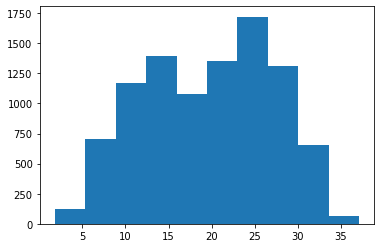

In [ ]:
# Check the distibution of Age varaible
plt.hist(data['Amb_Temperature'])
plt.show(True)

#### Bi-variate Analysis

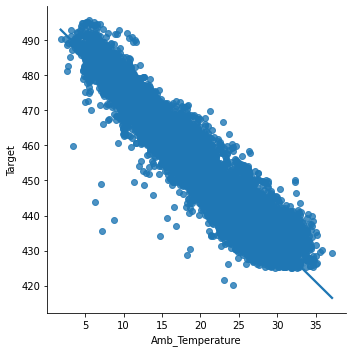

In [ ]:
# Plotting Numeric VS Numeric Data
#This function lmplot from seaborn combines regplot() and FacetGrid. 
#It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
sns.lmplot(x='Amb_Temperature', y='Target', data=data)
plt.show()

### Split the data in to train and test

In [ ]:
from sklearn.model_selection import train_test_split
traindata,testdata=train_test_split(data,random_state=30,test_size=0.3)
print("traindata",traindata.shape)
print("testdata",testdata.shape)

traindata (6697, 5)
testdata (2871, 5)


## Building a Linear  Regression  - using sklearn 
#### Most of the algorithms in the this modules need data to be in the numeric format

In [ ]:
print(data.columns)
ind_atr=list(set(data.columns)-set(['Target']))
print(ind_atr)

Index(['Amb_Temperature', 'Exhaust_Vaccum', 'Amb_Pressure', 'Rel_Humidity',
       'Target'],
      dtype='object')
['Exhaust_Vaccum', 'Amb_Temperature', 'Amb_Pressure', 'Rel_Humidity']


In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
res_sklearn=linreg.fit(traindata[ind_atr],traindata['Target'])

In [ ]:
print(res_sklearn.coef_)
print(res_sklearn.intercept_)

[-0.23122333 -1.97427171  0.06650276 -0.15922773]
449.94176591617116


In [ ]:
preds_train_sklearn=res_sklearn.predict(traindata[ind_atr])
preds_test_sklearn=res_sklearn.predict(testdata[ind_atr])

In [ ]:
#To compute mean absolute percentage error
def mape(actual,predicted):
    r=np.mean(abs(actual-predicted)/actual)*100
    return r 

In [ ]:
#To compute Root mean squared error
def rmse(actual,predicted):
    r=np.sqrt((np.mean((actual-predicted)**2)))
    return r   

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

m1=mean_absolute_error(traindata['Target'],preds_train_sklearn)
m2=mean_absolute_error(testdata['Target'],preds_test_sklearn)

print( "The Mean Absolute Error on train data is:",m1)
print( "The Mean Absolute Error on test data is:",m2)


m3=mape(traindata['Target'],preds_train_sklearn)
m4=mape(testdata['Target'],preds_test_sklearn)
print("The Mean Absolute Percentage Error on train data is: ",m3)
print("The Mean Absolute Percentage Error on test data is: ",m4)

m5=mean_squared_error(traindata['Target'],preds_train_sklearn)
m6=mean_squared_error(testdata['Target'],preds_test_sklearn)
print("The Mean Squared Error on train data is: ",m5)
print("The Mean Squared Error on test data is: ",m6)

m7=rmse(traindata['Target'],preds_train_sklearn)
m8=rmse(testdata['Target'],preds_test_sklearn)
print("The Root Mean Squared Error on test data is: ",m7)
print("The Root Mean Squared Error on train data is: ",m8)

The Mean Absolute Error on train data is: 3.6398359461191214
The Mean Absolute Error on test data is: 3.6005456420176047
The Mean Absolute Percentage Error on train data is:  0.8027165968260284
The Mean Absolute Percentage Error on test data is:  0.7933325040658884
The Mean Squared Error on train data is:  21.10238757312769
The Mean Squared Error on test data is:  20.01171384252855
The Root Mean Squared Error on test data is:  4.5937335113312505
The Root Mean Squared Error on train data is:  4.473445410701746


In [ ]:
#Empty Cell

## Building a Linear Model using stats package
* Using OLS method from stats
* Using Lienar Regression from Sklearn

#### Model fit and summary

Fitting a model in statsmodels typically involves 3 easy steps:

    Use the model class to describe the model
    Fit the model using a class method
    Inspect the results using a summary method


In [ ]:
Xtrain,Xtest=traindata[ind_atr],testdata[ind_atr]
Xtrain1=sm.add_constant(Xtrain,prepend=False)
Xtest1=sm.add_constant(Xtest,prepend=False)
ytrain=traindata['Target']
linregmod=sm.OLS(ytrain,Xtrain1).fit()

In [ ]:
linregmod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.927     
Dependent Variable:  Target           AIC:                39437.0020
Date:                2022-05-10 12:04 BIC:                39471.0491
No. Observations:    6697             Log-Likelihood:     -19714.   
Df Model:            4                F-statistic:        2.126e+04 
Df Residuals:        6692             Prob (F-statistic): 0.00      
R-squared:           0.927            Scale:              21.118    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Exhaust_Vaccum   -0.2312   0.0087  -26.4768 0.0000  -0.2483  -0.2141
Amb_Temperature  -1.9743   0.0184 -107.1452 0.0000  -2.0104  -1.9382
Amb_Pressure      0.0665   0.0113    5.8712 0.0000   0.0443   0.0887
Rel_Humidity     -0.1592   0.0050  -31.6776 0.0000  -0.1691  -0.1494
const           449.9418  11.6774   38.5309 0.0000 427.0503 472.8333
--------------------------------------------------------------------
Omnibus:              778.778       Durbin-Watson:          2.036   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       4169.398
Skew:                 -0.432        Prob(JB):               0.000   
Kurtosis:             6.768         Condition No.:          211614  
====================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("*******************")
print("Coeficient values:",linregmod.params)
    
print("R square:",linregmod.rsquared)
print("Adjusted R square:",linregmod.rsquared_adj)
print("*******************")
print("tvalue of the coefficients:",linregmod.tvalues)

print("pvalue of the coefficients:",linregmod.pvalues)
print("**************** End of model********************")

*******************
Coeficient values: Exhaust_Vaccum      -0.231223
Amb_Temperature     -1.974272
Amb_Pressure         0.066503
Rel_Humidity        -0.159228
const              449.941766
dtype: float64
R square: 0.9270538228435027
Adjusted R square: 0.9270102208248796
*******************
tvalue of the coefficients: Exhaust_Vaccum     -26.476813
Amb_Temperature   -107.145209
Amb_Pressure         5.871191
Rel_Humidity       -31.677639
const               38.530867
dtype: float64
pvalue of the coefficients: Exhaust_Vaccum     5.393798e-147
Amb_Temperature     0.000000e+00
Amb_Pressure        4.533963e-09
Rel_Humidity       2.499669e-205
const              1.570845e-293
dtype: float64
**************** End of model********************


In [ ]:
#Lets use variance inflation factor (VIF) to understand if there exist a multicollinearity and remove those attributes
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=traindata[ind_atr]
Xdata['intercept']=1

vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values

In [ ]:
vif

,Vif,Variables
0,3.908776,Exhaust_Vaccum
1,5.973101,Amb_Temperature
2,1.455897,Amb_Pressure
3,1.724133,Rel_Humidity
4,43243.357095,intercept


* Drop If there are any variables with VIF>5 and repeat the model building

##### Evaluating model performance

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error    
trainpreds=linregmod.fittedvalues
testpreds=linregmod.predict(Xtest1)

m1=mean_absolute_error(traindata['Target'],trainpreds)
m2=mean_absolute_error(testdata['Target'],testpreds)
print( "The Mean Absolute Error on train data is:",m1)
print( "The Mean Absolute Error on test data is:",m2)

The Mean Absolute Error on train data is: 3.6398359461191965
The Mean Absolute Error on test data is: 3.600545642017616


In [ ]:
#mean absolute percentage error
m3=mape(traindata["Target"],trainpreds)
m4=mape(testdata["Target"],testpreds)
print("The Mean Absolute Percentage Error on train data is: ",m3)
print("The Mean Absolute Percentage Error on test data is: ",m4)

The Mean Absolute Percentage Error on train data is:  0.8027165968260457
The Mean Absolute Percentage Error on test data is:  0.7933325040658927


In [ ]:
#Compute mean squared error
m5=mean_squared_error(traindata["Target"],trainpreds)
m6=mean_squared_error(testdata["Target"],testpreds)
print("The Mean Squared Error on train data is: ",m5)
print("The Mean Squared Error on test data is: ",m6)

The Mean Squared Error on train data is:  21.10238757312769
The Mean Squared Error on test data is:  20.011713842527765


In [ ]:
#Compute Root mean squared error
m7=rmse(traindata["Target"],trainpreds)
m8=rmse(testdata["Target"],testpreds)
print("The Root Mean Squared Error on test data is: ",m7)
print("The Root Mean Squared Error on train data is: ",m8)

The Root Mean Squared Error on test data is:  4.593733511331241
The Root Mean Squared Error on train data is:  4.473445410701657


In [ ]:
data_metrics=pd.DataFrame({"Experiment":"base","traindata":1,"Mae":m1,"Mape":m3,"Mse":m5,"Rmse":m7},index=range(0,1))
data_metrics.head()

,Experiment,traindata,Mae,Mape,Mse,Rmse
0,base,1,3.639836,0.802717,21.102388,4.593734


In [ ]:
def insertmetrics(df,par1,par2,par3,par4,par5,par6):
    temp=pd.DataFrame({"Experiment":par1,"traindata":par2,"Mae":par3,"Mape":par4,"Mse":par5,"Rmse":par6},index=range(0,1))
    df=df.append(temp,ignore_index=True)
    return df

In [ ]:
data_metrics=insertmetrics(data_metrics,"base",0,m2,m4,m6,m8)
data_metrics.head()

,Experiment,traindata,Mae,Mape,Mse,Rmse
0,base,1,3.639836,0.802717,21.102388,4.593734
1,base,0,3.600546,0.793333,20.011714,4.473445


### Exp2: Standardize the data and repeat the experiment

In [ ]:
from sklearn.preprocessing import StandardScaler
traindata_std=traindata.copy()
testdata_std=testdata.copy()

std=StandardScaler().fit(traindata[ind_atr])
traindata_std.loc[:,ind_atr]=std.transform(traindata[ind_atr])
testdata_std.loc[:,ind_atr]=std.transform(testdata[ind_atr])

In [ ]:
print(traindata_std.shape)
print(testdata_std.shape)
traindata_std.head(2)

(6697, 5)
(2871, 5)


,Amb_Temperature,Exhaust_Vaccum,Amb_Pressure,Rel_Humidity,Target
2959,0.043909,0.394821,0.761004,0.693909,450.41
5215,-0.129286,0.389315,0.608879,0.259667,452.85


In [ ]:
Xtrain_std=sm.add_constant(traindata_std[ind_atr],prepend=False)
Xtest_std=sm.add_constant(testdata_std[ind_atr],prepend=False)
linregmod_std=sm.OLS(traindata_std['Target'],Xtrain_std).fit()

In [ ]:
linregmod_std.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.927     
Dependent Variable:  Target           AIC:                39437.0020
Date:                2020-10-10 16:49 BIC:                39471.0491
No. Observations:    6697             Log-Likelihood:     -19714.   
Df Model:            4                F-statistic:        2.126e+04 
Df Residuals:        6692             Prob (F-statistic): 0.00      
R-squared:           0.927            Scale:              21.118    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
--------------------------------------------------------------------
Amb_Pressure      0.3978   0.0678    5.8712 0.0000   0.2650   0.5306
Exhaust_Vaccum   -2.9395   0.1110  -26.4768 0.0000  -3.1571  -2.7219
Amb_Temperature -14.7048   0.1372 -107.1452 0.0000 -14.9739 -14.4358
Rel_Humidity     -2.3357   0.0737  -31.6776 0.0000  -2.4803  -2.1912
const           454.3512   0.0562 8091.0301 0.0000 454.2411 454.4612
--------------------------------------------------------------------
Omnibus:              778.778       Durbin-Watson:          2.036   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       4169.398
Skew:                 -0.432        Prob(JB):               0.000   
Kurtosis:             6.768         Condition No.:          5       
====================================================================

"""

In [ ]:
trainpreds=linregmod_std.fittedvalues
testpreds=linregmod_std.predict(Xtest_std)
m1=mean_absolute_error(traindata_std['Target'],trainpreds)
m2=mean_absolute_error(testdata_std['Target'],testpreds)
m3=mape(traindata_std['Target'],trainpreds)
m4=mape(testdata_std['Target'],testpreds)
m5=mean_squared_error(traindata_std['Target'],trainpreds)
m6=mean_squared_error(testdata_std['Target'],testpreds)
m7=rmse(traindata_std['Target'],trainpreds)
m8=rmse(testdata_std['Target'],testpreds)

In [ ]:
data_metrics=insertmetrics(data_metrics,"linreg_std",1,m1,m3,m5,m7)
data_metrics=insertmetrics(data_metrics,"linreg_std",0,m2,m4,m6,m8)

In [ ]:
data_metrics

,Experiment,traindata,Mae,Mape,Mse,Rmse
0,base,1,3.639836,0.802717,21.102388,4.593734
1,base,0,3.600546,0.793333,20.011714,4.473445
2,linreg_std,1,3.639836,0.802717,21.102388,4.593734
3,linreg_std,0,3.600546,0.793333,20.011714,4.473445


In [ ]:
# Empty Cell

In [ ]:
# Empty Cell

In [ ]:
# Empty Cell

In [ ]:
# Empty Cell

In [ ]:
# Empty Cell

### Additional Material-
#### Diagnostic Checks and improvements- more experiments

##### Lets look into the diagnostic plots - for the model we built earlier linregmodel
    * Linearity & Equal Variance: Residual Vs Fitted Plot
    * q-q plot
    * Residual vs Leverage
    * Cook's Distance

##### Residual vs Fitted plot

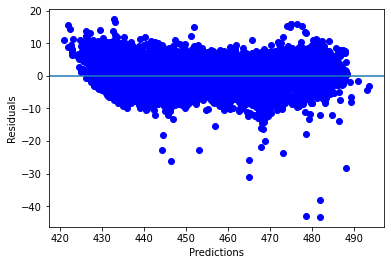

In [ ]:
# Check the diagnostic plots for the first model
preds_tr=linregmod.fittedvalues
residuals=linregmod.resid
plt.figure()
plt.plot(preds_tr,residuals,'bo')
plt.axhline(y=0)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show(block=True)

#### qqplot

<Figure size 576x360 with 0 Axes>

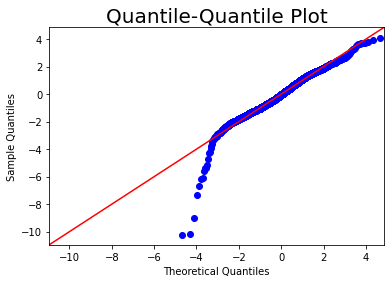

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(8,5))
sm.qqplot(residuals, stats.t, fit=True, line="45")
plt.title('Quantile-Quantile Plot',fontsize=20)
plt.show(True)

### Exp3: Check target variable distribution and transform the target if required

(array([ 111.,  823., 1246., 1026.,  714.,  765.,  795.,  682.,  418.,
         117.]),
 array([420.26 , 427.769, 435.278, 442.787, 450.296, 457.805, 465.314,
        472.823, 480.332, 487.841, 495.35 ]),
 <a list of 10 Patch objects>)

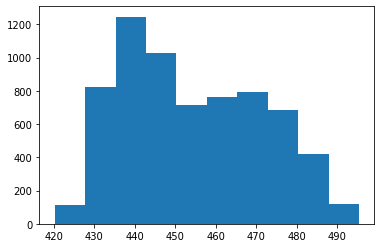

In [ ]:
plt.hist(traindata["Target"])

In [ ]:
# Boxcox transforamtion- boxcox from stata does not have inv_boxcox- so get the lamda from here
from scipy import stats
#fig = plt.figure()
#ax2 = fig.add_subplot(212)
xt, fittedlamda = stats.boxcox(traindata['Target'])
#prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
#fittedlamda used to fit on testdata; Get the fitted lambda from the above code.

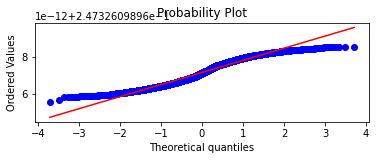

In [ ]:
# from the above code- lambda can be used to apply on trian and test in the following wat
from scipy.special import boxcox, inv_boxcox
ytrain1 = boxcox(traindata['Target'], fittedlamda)
fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = stats.probplot(ytrain1, dist=stats.norm, plot=ax2)

(array([  15.,  347.,  846., 1050.,  935.,  714.,  826.,  915.,  780.,
         269.]),
 array([0.2473261, 0.2473261, 0.2473261, 0.2473261, 0.2473261, 0.2473261,
        0.2473261, 0.2473261, 0.2473261, 0.2473261, 0.2473261]),
 <a list of 10 Patch objects>)

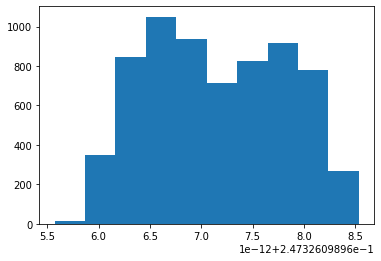

In [ ]:
plt.hist(ytrain1)

* Observation: You see distribution got changed a bit

In [ ]:
# Fit the model on transformed target 
linregmod1=sm.OLS(ytrain1,Xtrain1).fit()

In [ ]:
ind_atr

['Exhaust_Vaccum', 'Amb_Temperature', 'Amb_Pressure', 'Rel_Humidity']

In [ ]:
trainpreds=inv_boxcox(linregmod1.fittedvalues,fittedlamda)
testpreds=inv_boxcox(linregmod1.predict(Xtest1),fittedlamda)
m1=mean_absolute_error(traindata['Target'],trainpreds)
m2=mean_absolute_error(testdata['Target'],testpreds)
print( "The Mean Absolute Error on train data is:",m1)
print( "The Mean Absolute Error on test data is:",m2)

m3=mape(traindata["Target"],trainpreds)
m4=mape(testdata["Target"],testpreds)
print("The Mean Absolute Percentage Error on train data is: ",m3)
print("The Mean Absolute Percentage Error on test data is: ",m4)

m5=mean_squared_error(traindata["Target"],trainpreds)
m6=mean_squared_error(testdata["Target"],testpreds)
print("The Mean Squared Error on train data is: ",m5)
print("The Mean Squared Error on test data is: ",m6)

m7=rmse(traindata["Target"],trainpreds)
m8=rmse(testdata["Target"],testpreds)
print("The Root Mean Squared Error on test data is: ",m7)
print("The Root Mean Squared Error on train data is: ",m8)

The Mean Absolute Error on train data is: 3.5197054513033543
The Mean Absolute Error on test data is: 3.4905642900254823
The Mean Absolute Percentage Error on train data is:  0.7749633833431959
The Mean Absolute Percentage Error on test data is:  0.7677117730564971
The Mean Squared Error on train data is:  19.678526959139802
The Mean Squared Error on test data is:  18.543924628083
The Root Mean Squared Error on test data is:  4.43604857493015
The Root Mean Squared Error on train data is:  4.306265740532396


In [ ]:
data_metrics=insertmetrics(data_metrics,"Target_Boxcox",1,m1,m3,m5,m7)
data_metrics=insertmetrics(data_metrics,"Target_Boxcox",0,m2,m4,m6,m8)

In [ ]:
data_metrics.to_csv("Data_metrics.csv")

In [ ]:
data_metrics

,Experiment,traindata,Mae,Mape,Mse,Rmse
0,base,1,3.639836,0.802717,21.102388,4.593734
1,base,0,3.600546,0.793333,20.011714,4.473445
2,linreg_std,1,3.639836,0.802717,21.102388,4.593734
3,linreg_std,0,3.600546,0.793333,20.011714,4.473445
4,Target_Boxcox,1,3.519705,0.774963,19.678527,4.436049
5,Target_Boxcox,0,3.490564,0.767712,18.543925,4.306266


In [ ]:
pd.DataFrame({'residuals':residuals}).reset_index(drop=True).to_csv("./Residuals.csv")

## Influential points

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
influence_points = OLSInfluence(linregmod1) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

,0
count,6.697000e+03
mean,-4.688652e-18
std,1.534789e-16
min,-1.961574e-15
25%,-8.161062e-17
50%,2.791824e-18
75%,7.366279e-17
max,8.497024e-16


In [ ]:
influence_data = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
Xtrain['influence_value']= influence_points.influence
Xtrain.loc[influence_data.index,].sort_values(['influence_value'], ascending = False).head(10)


,Exhaust_Vaccum,Amb_Temperature,Amb_Pressure,Rel_Humidity,influence_value


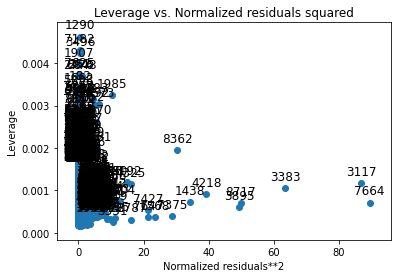

In [ ]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
#fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(linregmod1, ax=ax)


In [ ]:
Xtrain.loc[[3383,3117,7664]]

,Exhaust_Vaccum,Amb_Temperature,Amb_Pressure,Rel_Humidity,influence_value
3383,39.85,6.22,1012.05,86.88,-1.510601e-15
3117,36.30,8.74,1015.18,61.97,-1.961574e-15
7664,41.22,7.14,1016.60,97.09,-1.219205e-15


In [ ]:
Xtrain[~Xtrain.index.isin(influence_data.index)]

,Exhaust_Vaccum,Amb_Temperature,Amb_Pressure,Rel_Humidity,influence_value
2959,59.21,19.97,1017.87,83.46,9.044834e-18
5215,59.14,18.68,1016.96,77.09,-6.876726e-19
8118,38.73,13.11,1005.89,89.02,2.065894e-16
4113,60.37,25.32,1006.19,73.94,-4.604072e-17
3253,59.27,25.50,1012.92,68.88,7.323289e-18
...,...,...,...,...,...
4859,38.52,16.81,1018.26,75.21,-1.239569e-16
919,66.93,27.56,1016.81,55.59,1.488972e-16
500,63.77,23.69,1013.39,79.50,2.343154e-17
4517,69.75,33.08,1009.03,43.69,1.820043e-16


In [ ]:
Xtrain[~Xtrain.index.isin(influence_data.index)]['Exhaust_Vaccum'].mean()

54.19070479319109

In [ ]:
customers_clean.loc[[0,1,499]]

